<a href="https://colab.research.google.com/github/MichaelArgs/Tugas-PenambanganData/blob/main/studikasus_A11_2022_14567_Michael_Argento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDIKSI CUACA**

Dalam project ini kita akan melakukan prediksi cuaca dengan dataset **seattle-weather**.

Link **dataset**:
https://drive.google.com/file/d/1IIyYZEQReb4VavO_piu3qQeGK6VcwGJm/view?usp=sharing

## **Data Preprocessing**

1. Isi _code-cell_ dibawah dengan kode untuk:
    - **import library** yang digunakan
    - **membaca dataset** _seattle-weather_
    - **menampilkan 15** baris data teratas



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
file_path = 'seattle-weather.csv'
data = pd.read_csv(file_path)

In [5]:
data['date'] = pd.to_datetime(data['date'])

print(data.head(15))

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain
5  2012-01-06            2.5       4.4       2.2   2.2     rain
6  2012-01-07            0.0       7.2       2.8   2.3     rain
7  2012-01-08            0.0      10.0       2.8   2.0      sun
8  2012-01-09            4.3       9.4       5.0   3.4     rain
9  2012-01-10            1.0       6.1       0.6   3.4     rain
10 2012-01-11            0.0       6.1      -1.1   5.1      sun
11 2012-01-12            0.0       6.1      -1.7   1.9      sun
12 2012-01-13            0.0       5.0      -2.8   1.3      sun
13 2012-01-14            4.1       4.4       0.6   5.3     snow
14 2012-01-15            5.3       1.1  

2. Munculkan **informasi** dataset dan lakukan **cleaning data** yang dibutuhkan:
    - mengecek dan menghapus **nilai kosong**
    - menghapus (**_drop_**) kolom _"date"_
    - mengecek dan menghapus data yang memiliki **nilai duplikat**

In [6]:
data = data.dropna()
print("\nJumlah nilai kosong setelah dibersihkan:", data.isnull().sum().sum())


Jumlah nilai kosong setelah dibersihkan: 0


In [7]:
data = data.drop(columns=['date'])
print(data.columns)

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [8]:
data = data.drop_duplicates()
print("\nJumlah data setelah duplikat dihapus:", data.shape[0])


Jumlah data setelah duplikat dihapus: 1453


In [9]:
print(data.head(15))

    precipitation  temp_max  temp_min  wind  weather
0             0.0      12.8       5.0   4.7  drizzle
1            10.9      10.6       2.8   4.5     rain
2             0.8      11.7       7.2   2.3     rain
3            20.3      12.2       5.6   4.7     rain
4             1.3       8.9       2.8   6.1     rain
5             2.5       4.4       2.2   2.2     rain
6             0.0       7.2       2.8   2.3     rain
7             0.0      10.0       2.8   2.0      sun
8             4.3       9.4       5.0   3.4     rain
9             1.0       6.1       0.6   3.4     rain
10            0.0       6.1      -1.1   5.1      sun
11            0.0       6.1      -1.7   1.9      sun
12            0.0       5.0      -2.8   1.3      sun
13            4.1       4.4       0.6   5.3     snow
14            5.3       1.1      -3.3   3.2     snow


## **Visualisasi**

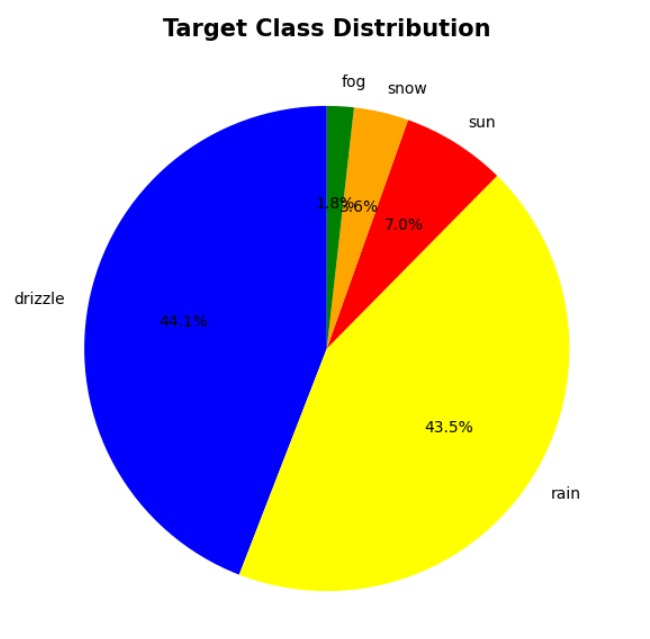

3. Diatas adalah contoh visualisasi menggunakan _diagram pie_,

    buatlah **visualisasi distribusi _target-class_** seperti diatas!

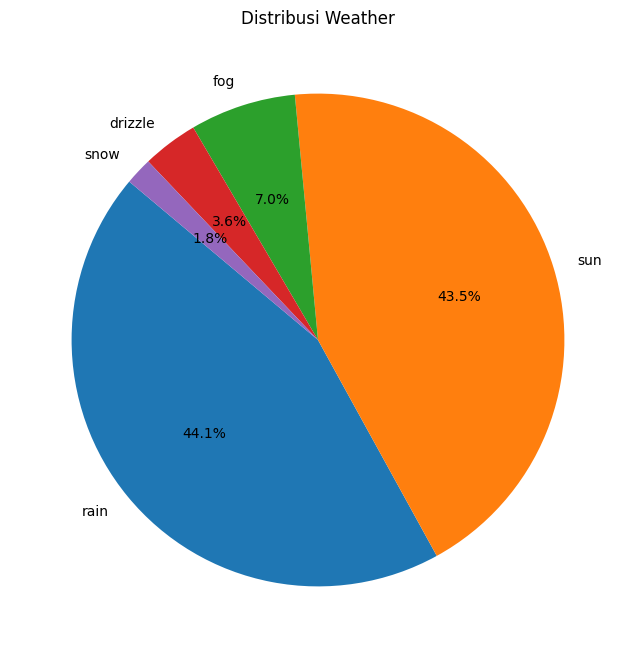

In [10]:
weather_counts = data['weather'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Weather')
plt.show()

4. Anda akan melakukan **visualisasi relasi antar fitur** menggunakan _diagram scatter_.


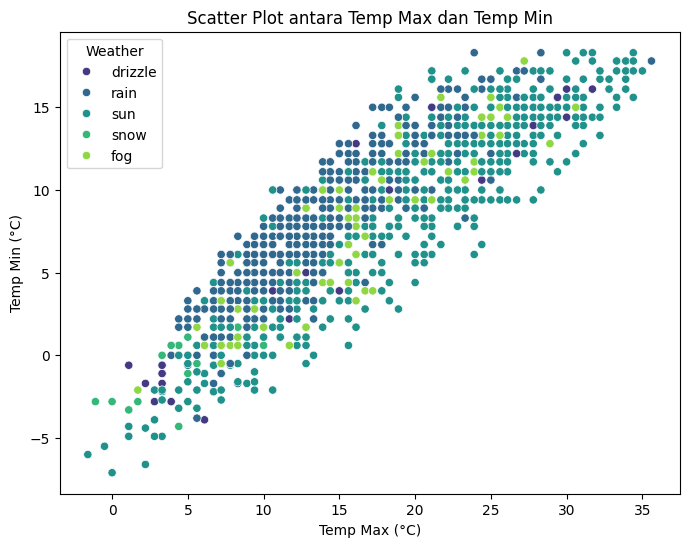

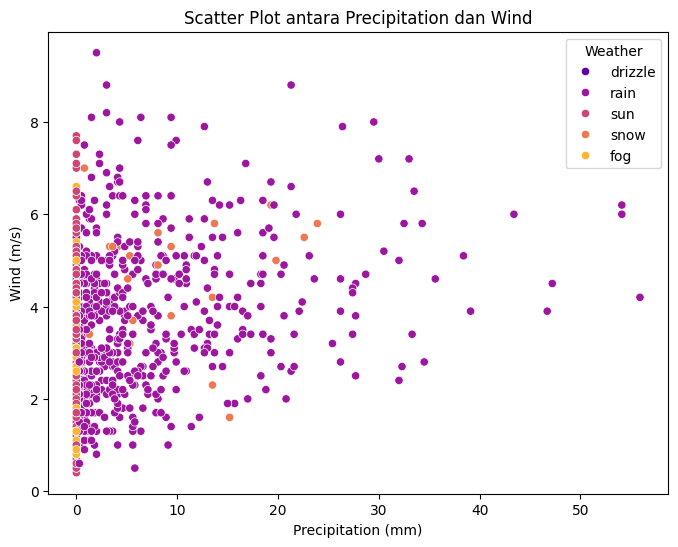

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='temp_max', y='temp_min', hue='weather', palette='viridis')
plt.title('Scatter Plot antara Temp Max dan Temp Min')
plt.xlabel('Temp Max (°C)')
plt.ylabel('Temp Min (°C)')
plt.legend(title='Weather')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='precipitation', y='wind', hue='weather', palette='plasma')
plt.title('Scatter Plot antara Precipitation dan Wind')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Wind (m/s)')
plt.legend(title='Weather')
plt.show()

## **Modelling**

5. **Bagi dataset** menjadi _train-set_ dan _test-set_ dengan ketentuan sebagai berikut:

    a. X = seluruh kolom fitur kecuali kolom target

    b. y = kolom target
    
    c. Bagi dengan rasio 70% _train-set_ dan 30% _test-set_

In [12]:
X = data.drop(columns=['weather'])
y = data['weather']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (1017, 4)
Ukuran X_test: (436, 4)
Ukuran y_train: (1017,)
Ukuran y_test: (436,)


6. Buatlah **diagram pie** untuk data train dan data test seperti gambaer dibawah ini

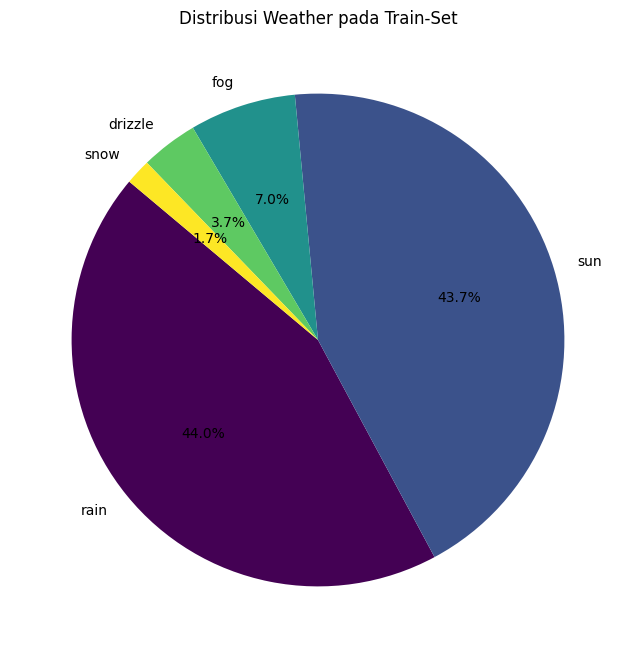

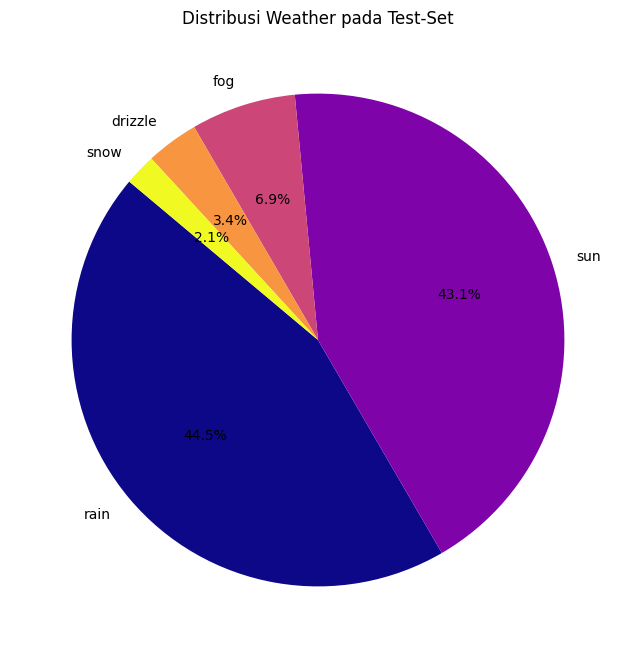

In [13]:
plt.figure(figsize=(8, 8))
train_colors = plt.cm.viridis(np.linspace(0, 1, y_train.nunique()))
y_train.value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=train_colors)
plt.title('Distribusi Weather pada Train-Set')
plt.ylabel('')
plt.show()

plt.figure(figsize=(8, 8))
test_colors = plt.cm.plasma(np.linspace(0, 1, y_test.nunique()))
y_test.value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=test_colors)
plt.title('Distribusi Weather pada Test-Set')
plt.ylabel('')
plt.show()

7.  Buatlah model dengan salah satu algoritma klasifikasi lalu latih dan prediksi dataset!

In [ ]:
# tulis jawaban anda pada code-cell berikut

## **Evaluasi**

8. Munculkan akurasi yang dihasilkan dari model yang anda gunakan.

In [ ]:
# tulis jawaban anda pada code-cell berikut

## **Kesimpulan**

9. Berikan kesimpulan dari project yang telah anda buat.

_Tulis **jawaban** no. 9 disini_

...

10. Upload Project anda kedalam link **Google Drive** berikut